In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# modules made for assignment
from modules import LoadData
from modules import ShowImage
from modules import label_split
from modules import kNearestClassifier
from modules import evaluation_kNearest

%matplotlib inline

In [2]:
def kNearestClassifier(x,y,value_to_predict,k=1):

    ones = np.ones(x.shape[0])
    data = np.array(x)

    subtractor = np.outer(ones,value_to_predict)

    matrix = data - subtractor

    dist_before_sq = np.diag(np.inner(matrix,matrix)) # distance before squareing
    dist = np.sqrt(dist_before_sq) # all distances

    sorter = np.argsort(dist)

    sorted_y = y[sorter] # labels sorted according to distance
    counts = np.bincount(sorted_y[:k])
    return np.argmax(counts)

In [3]:
#LoadData.MNIST() #Data is cleaned to proper format

In [4]:
df_train = pd.read_csv('MNIST_df_train.csv')
df_test = pd.read_csv('MNIST_df_test.csv')

In [5]:
df_train.labs = df_train.labs.astype('int64')
df_test.labs = df_test.labs.astype('int64')

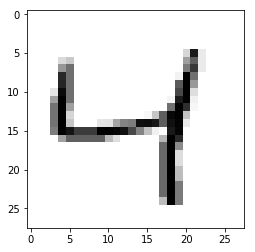

In [6]:
ShowImage(df_train, 2)

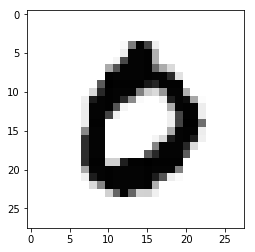

In [7]:
ShowImage(df_test, 3)

In [8]:
def DevelopData(df_input, val_a, val_b): 
    df = df_input.loc[(df_input['labs']==val_a)|(df_input['labs']==val_b)]
    df = df.iloc[0:100]
    return df

In [9]:
df = DevelopData(df_train, val_a = 0, val_b = 1)
df_test = DevelopData(df_test, val_a = 0, val_b = 1)

In [10]:
x, y = label_split(df)

In [11]:
#df_test.drop('prediction',axis=1, inplace=True)

df_test['prediction'] = df_test.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_test.columns if i not in ['labs', 'prediction']], k=100),axis=1)


In [12]:
def evaluation_kNearest(df):
    labs = np.array(df['labs'])
    preds = np.array(df['prediction'])
    
    diff = abs(labs-preds)
    
    return sum(diff)/len(diff)
    

In [13]:
a = np.array([2,3,4,-5,4])
abs(a)

array([2, 3, 4, 5, 4])

In [14]:
a = np.array([1,0,0,1,0])
b = np.array([1,0,1,1,1])

In [15]:
len(abs(a-b))

5

In [16]:
evaluation_kNearest(df_test)

0.38

In [22]:
k_list = [i*2 + 1 for i in range(15)]
pred_list = []

for k in k_list:
    df_test['prediction'] = df_test.apply(lambda prediction: kNearestClassifier(x,y,[prediction[i] for i in df_test.columns if i not in ['labs', 'prediction']], k=k),axis=1)
    pred_list.append(evaluation_kNearest(df_test))
    
%time
     

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


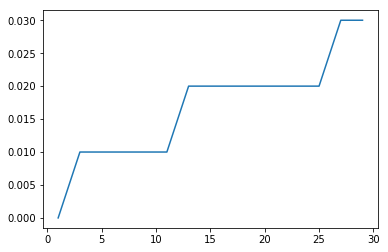

In [21]:
plt.plot(k_list, pred_list)